In [7]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt

from eda_utils import display_img_with_mask

In [9]:
%%time
df = pd.read_csv('../data/windows.csv', index_col=0)
df

CPU times: user 25 ms, sys: 8.07 ms, total: 33.1 ms
Wall time: 29.7 ms


,Index,ImageId,ClassId,instance_center_x,instance_min_x,instance_max_x,instance_std_x,instance_size,window_size,all_instances_fit_in_window,all_overlapping_appx_centered
0,1,0002cc93b.jpg,1,342.052478,332,355,5.489558,23,160,True,True
1,2,0002cc93b.jpg,1,120.164223,113,127,4.188661,14,160,True,True
2,4,0002cc93b.jpg,1,747.768571,741,755,3.697201,14,160,True,True
3,5,0007a71bf.jpg,3,1155.511409,1145,1167,6.364029,22,160,True,True
4,21,005f02e20.jpg,3,1268.437154,1244,1296,13.235993,52,160,True,True
...,...,...,...,...,...,...,...,...,...,...,...
7490,16218,ffff4eaa8.jpg,3,101.358385,66,140,16.610888,74,160,True,True
7491,16219,ffff4eaa8.jpg,3,387.758572,372,403,7.063772,31,160,True,True
7492,16220,ffff4eaa8.jpg,3,577.653570,564,591,5.821356,27,160,True,True
7493,16221,ffff4eaa8.jpg,3,263.270396,252,275,5.788046,23,160,True,True


CPU times: user 8.5 s, sys: 315 ms, total: 8.82 s
Wall time: 10 s


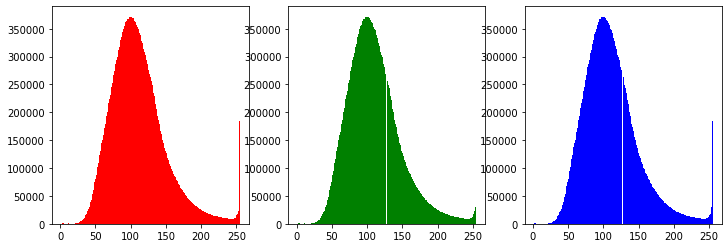

In [14]:
%%time

images = []

for row in df.sample(frac=0.1, random_state=42).itertuples():
    img = plt.imread(os.path.join('..', 'data', 'train_images', row.ImageId))
    hw = row.window_size // 2
    extra = row.window_size % 2
    min_x, max_x = int(row.instance_center_x - hw), int(row.instance_center_x + hw + extra)
    img = img[:, min_x:max_x]
    images.append(img)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, (ax, color) in enumerate(zip(axes.flat, ['red', 'green', 'blue'])):
    ax.hist(np.concatenate([np.ravel(img[:, :, i]) for img in images]),
            label=color, color=color, bins=256)

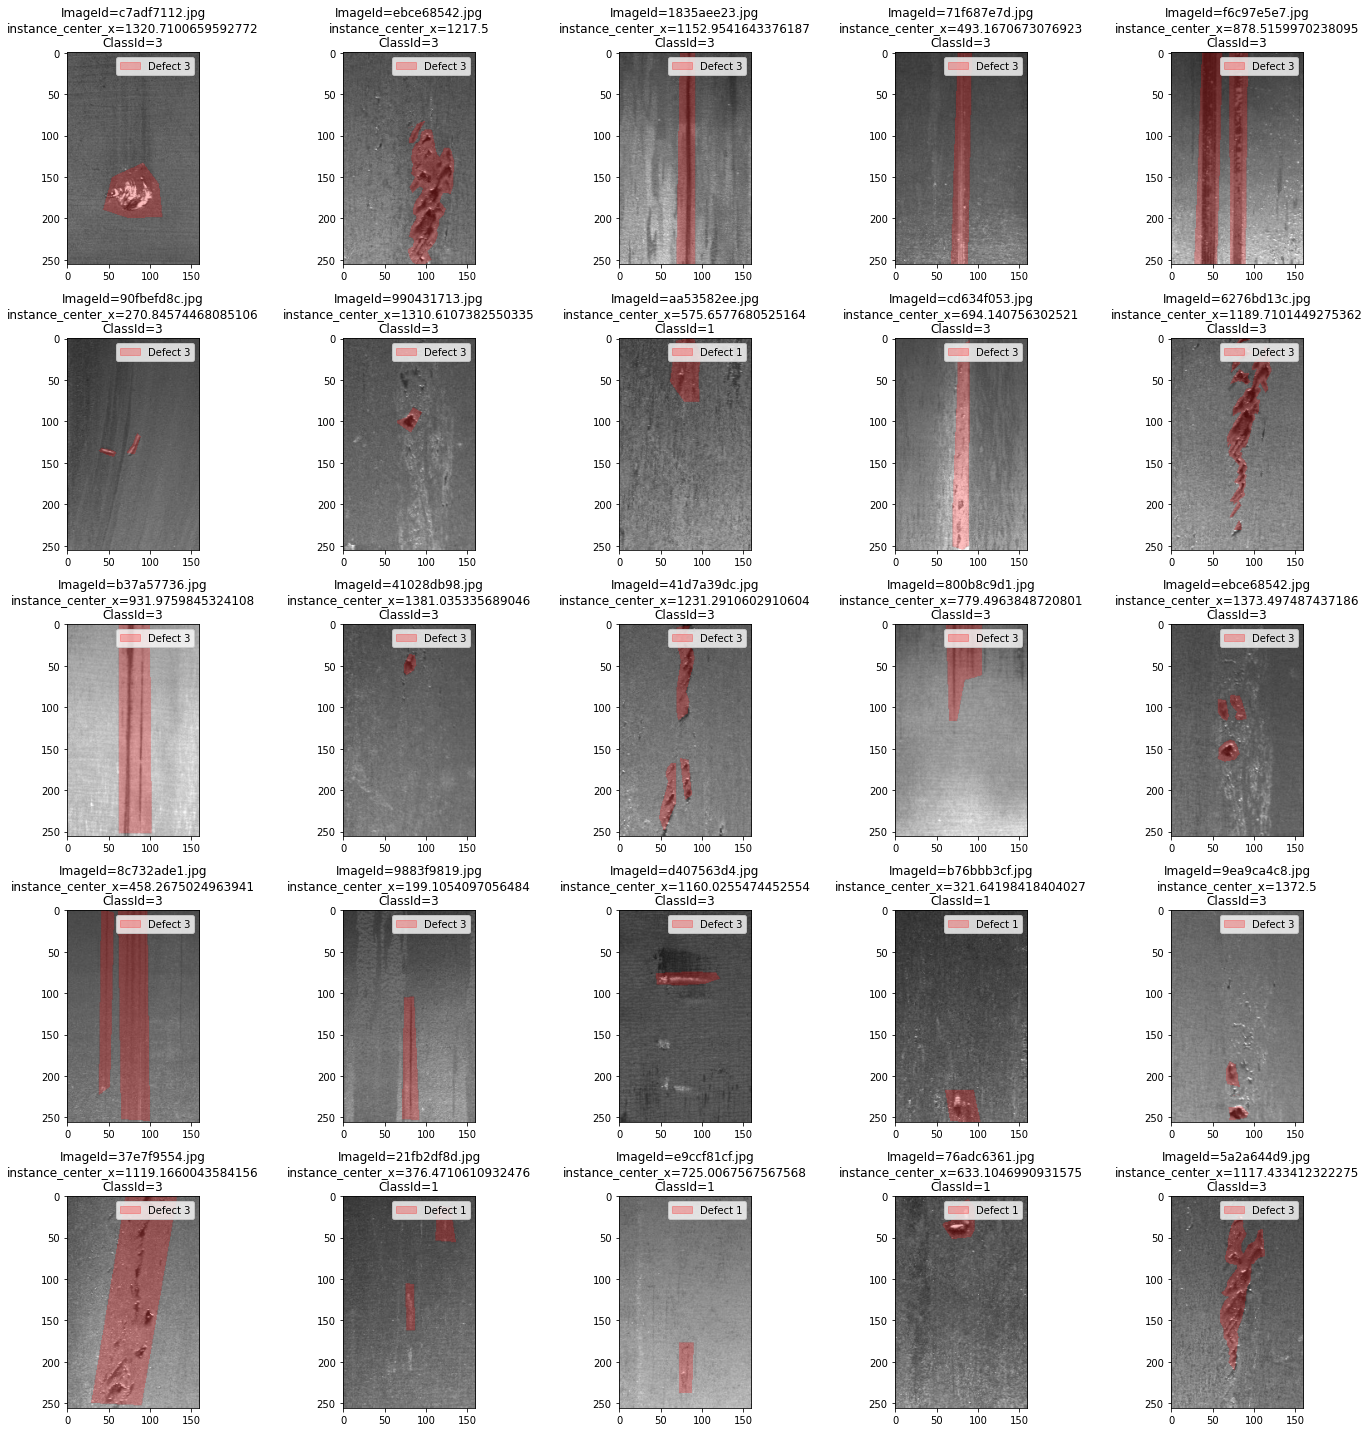

In [22]:
nrows = 5
fig, axes = plt.subplots(nrows, 5, figsize=(20, 4 * nrows))

train_df = pd.read_csv('../data/train.csv')
for ax, row in zip(axes.flat, df.sample(frac=1, random_state=13).itertuples()):
    ax.set_title(f'ImageId={row.ImageId}\ninstance_center_x={row.instance_center_x}\nClassId={row.ClassId}')
    hw = row.window_size // 2
    x_min, x_max = int(row.instance_center_x - hw), int(row.instance_center_x + hw)
    if x_min < 0:
        print(f'x_min={x_min} is off the edge, setting to 0')
        x_min = 0
    if x_max > 1600:
        print(f'x_max={x_max} is off the edge, setting to 1600')
        x_max = 1600
    display_img_with_mask(train_df, row.ImageId, 
                          x_window=(x_min, x_max), 
                          ax=ax)

plt.tight_layout()

In [16]:
df.ClassId.value_counts()

3    6634
1     861
Name: ClassId, dtype: int64

In [17]:
vc = df.ClassId.value_counts()
vc / np.sum(vc) * 100

3    88.512342
1    11.487658
Name: ClassId, dtype: float64

Num class 3 sampled = 1320, Num class 1 sampled = 179
CPU times: user 17.4 s, sys: 431 ms, total: 17.9 s
Wall time: 18 s


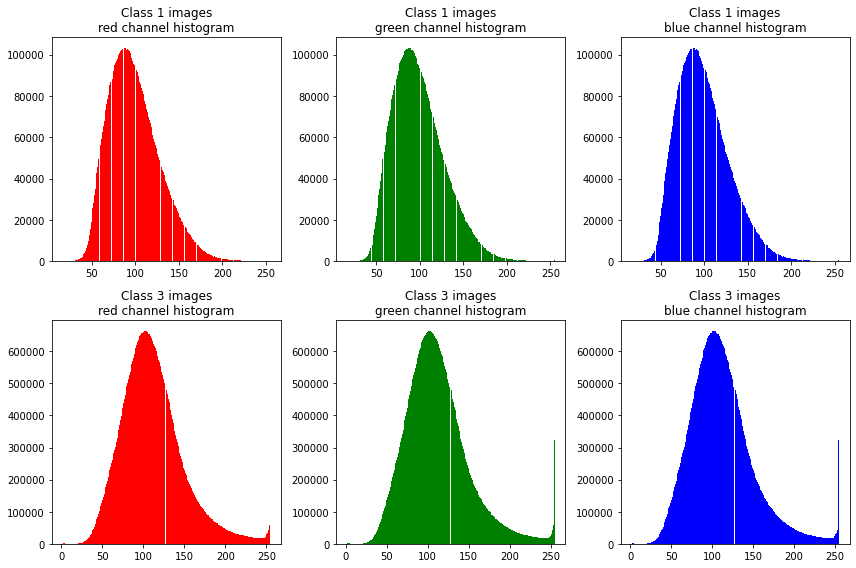

In [25]:
%%time

class_1_images = []
class_3_images = []

for row in df.sample(frac=0.2, random_state=42).itertuples():
    img = plt.imread(os.path.join('..', 'data', 'train_images', row.ImageId))
    hw = row.window_size // 2
    extra = row.window_size % 2
    min_x, max_x = int(row.instance_center_x - hw), int(row.instance_center_x + hw + extra)
    img = img[:, min_x:max_x]
    if row.ClassId == 3:
        class_3_images.append(img)
    elif row.ClassId == 1:
        class_1_images.append(img)
    else:
        raise Exception()

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

print(f"Num class 3 sampled = {len(class_3_images)}, Num class 1 sampled = {len(class_1_images)}")

for i, (ax, color) in enumerate(zip(axes.flat[:3], ['red', 'green', 'blue'])):
    ax.hist(np.concatenate([np.ravel(img[:, :, i]) for img in class_1_images]),
            label=color, color=color, bins=256)
    ax.set_title(f'Class 1 images\n{color} channel histogram')

for i, (ax, color) in enumerate(zip(axes.flat[3:], ['red', 'green', 'blue'])):
    ax.hist(np.concatenate([np.ravel(img[:, :, i]) for img in class_3_images]),
            label=color, color=color, bins=256)
    ax.set_title(f'Class 3 images\n{color} channel histogram')

plt.tight_layout()